# **Explorando dados de Vendas de games**

In [1]:
#Blicliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#carregando o arquivo
df_vendas_games = pd.read_csv('vgsales.csv')

In [3]:
df_vendas_games.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [4]:
df_vendas_games.shape

(16598, 11)

In [5]:
# Descreve o nome das colunas
df_vendas_games.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
#Mostra o indice 
#começa em  0, termina em 16598 e vai de 1 em 1
df_vendas_games.index

RangeIndex(start=0, stop=16598, step=1)

In [7]:
df_vendas_games.isnull().count()

Rank            16598
Name            16598
Platform        16598
Year            16598
Genre           16598
Publisher       16598
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [8]:
#Limpa se houves valores vazios no Dataframe
df_vendas_games.dropna(inplace=True)

In [9]:
df_vendas_games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
df_vendas_games['NA_Sales'].sum()

4327.650000000001

In [11]:
df_vendas_games['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

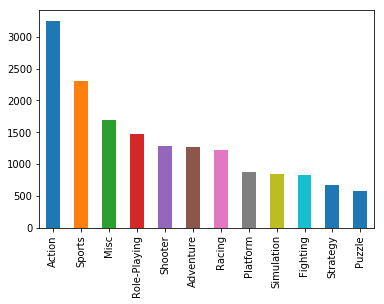

In [12]:
# Quantidades de venda por genero
df_vendas_games['Genre'].value_counts().plot.bar();

In [13]:
# Cria coluna nova
df_vendas_games['Nova coluna'] = 0

In [14]:
#Somando os valores em uma coluna de 'total'
df_vendas_games['Total vendas'] = df_vendas_games['NA_Sales'] + df_vendas_games['EU_Sales'] + df_vendas_games['JP_Sales'] + df_vendas_games['Other_Sales'] + df_vendas_games['Global_Sales']

In [15]:
#Verificando se há duplicados.
print(df_vendas_games.duplicated('Rank'))

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
16568    False
16569    False
16570    False
16571    False
16572    False
16573    False
16574    False
16575    False
16576    False
16577    False
16578    False
16579    False
16580    False
16581    False
16582    False
16583    False
16584    False
16585    False
16586    False
16587    False
16588    False
16589    False
16590    False
16591    False
16592    False
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16291, dtype: bool


In [16]:
#Nome_dataframe.função('coluna a ser somada', indice=['porqualcritério'],operação='soma',mostra total na ultima linha)
df_vendas_games.pivot_table('Global_Sales',index=['Platform'],aggfunc='sum',margins=True)

,Global_Sales
Platform,
2600,86.57
3DO,0.10
3DS,246.27
DC,15.97
DS,818.91
GB,254.42
GBA,305.62
GC,197.14
GEN,28.36


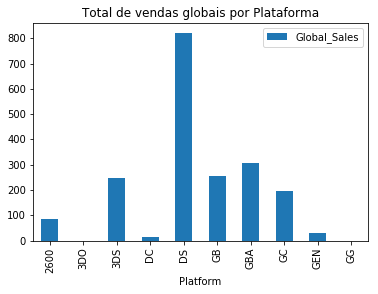

In [17]:
#Grafico total de vendas globais por Plataforma
Barras1 = df_vendas_games.pivot_table('Global_Sales',index=['Platform'],aggfunc='sum').head(10)
Barras1.plot.bar(title='Total de vendas globais por Plataforma');

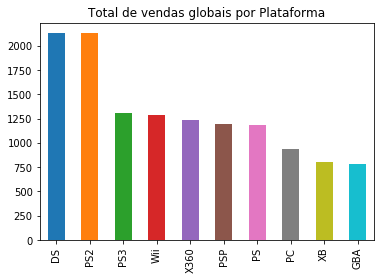

In [18]:
barras2 = df_vendas_games['Platform'].value_counts().head(10)
barras2.plot.bar(title='Total de vendas globais por Plataforma');

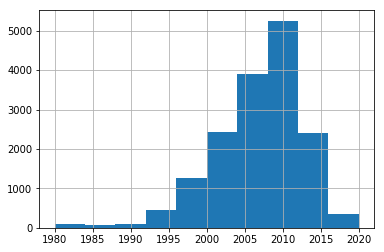

In [19]:
df_vendas_games['Year'].hist();

In [20]:
labellist0 = df_vendas_games['Publisher'].value_counts().head(5)
print(labellist0)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: Publisher, dtype: int64


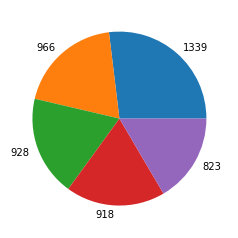

In [21]:
qte = df_vendas_games['Publisher'].value_counts().head(5).values
plt.pie(qte, labels=qte);